In [30]:
import itertools
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
import pandas as pd
import matplotlib as mpl

In [27]:
plt.rcParams['font.family'] = 'Hiragino Sans'

In [6]:
img_orig = io.imread('https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/imori_256x256.png?raw=true')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
img_128 = io.imread('https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/imori_128x128.png?raw=true')
img_gray_128 = cv2.cvtColor(img_128, cv2.COLOR_RGB2GRAY)
img_noise = io.imread('https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/imori_256x256_noise.png?raw=true')
img_dark = io.imread('https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/imori_256x256_dark.png?raw=true')
img_dark_gray = cv2.cvtColor(img_dark, cv2.COLOR_RGB2GRAY)
img_light = io.imread('https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/imori_256x256_light.png?raw=true')
img_light_gray = cv2.cvtColor(img_light, cv2.COLOR_RGB2GRAY)

img_thorino = io.imread('https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/thorino.jpg?raw=true')
img_thorino_gray = cv2.cvtColor(img_thorino, cv2.COLOR_RGB2GRAY)

img_eye = io.imread("https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/imori_256x256_eye.png?raw=true")
img_eye = cv2.cvtColor(img_eye, cv2.COLOR_RGBA2RGB)

img_seg = io.imread("https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/seg_sample.png?raw=true")
img_connect = io.imread("https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/connect_sample.png?raw=true")
img_gazo = io.imread("https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/gazo_sample.png?raw=true")

## k-means法

![](https://camo.qiitausercontent.com/147c1ba0c5351a9f90102d83aa542e385cf63fce/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e61702d6e6f727468656173742d312e616d617a6f6e6177732e636f6d2f302f3734333435332f62623235373965382d366366362d386138302d333639652d3530303730636134653466302e706e67)

https://qiita.com/DS27/items/fca4cf34fc50a2344695

In [36]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

Text(0, 0.5, 'petal_width')

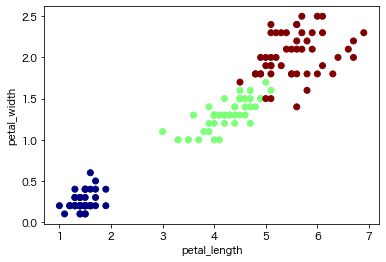

In [37]:
# データ読み込み
iris = load_iris()
iris.keys()

# データフレームに格納
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target # アヤメの種類（正解ラベル）
df_iris.head()

# 2変数の散布図（正解ラベルで色分け）
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=df_iris.target, cmap=mpl.cm.jet)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

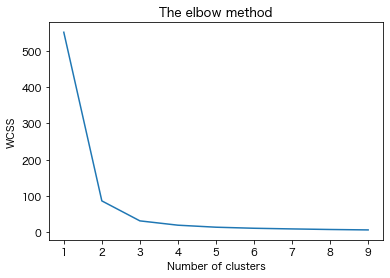

In [35]:
# Elbow Method
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 30, random_state = 0)
    kmeans.fit(df_iris.iloc[:, 2:4])
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

Text(0.5, 1.0, 'Predict')

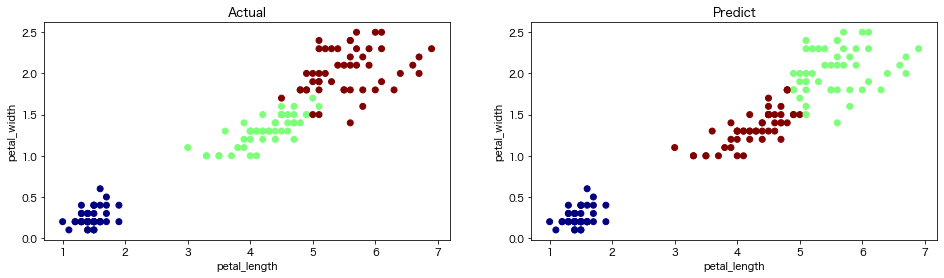

In [39]:
# モデリング
clf = KMeans(n_clusters=3, random_state=1)
clf.fit(df_iris.iloc[:, 2:4])

# 学習データのクラスタ番号
clf.labels_

# 未知データに対してクラスタ番号を付与
# 今回は学習データに対して予測しているので、`clf.labels_` と同じ結果
y_pred = clf.predict(df_iris.iloc[:, 2:4])
y_pred

# 実際の種類とクラスタリングの結果を比較
fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2)

# 実際の種類の分布
ax1.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=df_iris.target, cmap=mpl.cm.jet)
ax1.set_xlabel('petal_length')
ax1.set_ylabel('petal_width')
ax1.set_title('Actual')

# クラスター分析で分類されたクラスタの分布
ax2.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=y_pred, cmap=mpl.cm.jet)
ax2.set_xlabel('petal_length')
ax2.set_ylabel('petal_width')
ax2.set_title('Predict')

**クラスタ内平方和（Within-Cluster Sum of Squares: WCSS）** を計算することで、クラスタリング結果の良し悪しを定量的に評価することができる。

WCSS: すべてのクラスタについて、所属するデータ点とクラスタ重心の距離の平方和を計算し、それらについて和をとったもの。この値が小さいほど良いクラスタリングといえる。

**Elbow法** によって、妥当なクラスタ数を決定することができる（他にも手法はある）。

クラスタ数を増やしていくとWCSSが減少するが、この減少があるクラスタ数からゆるやかになっていくことがある。急激な減少とゆるやかな減少の境目の「肘」のように見える点を目安にクラスタ数を決める。クラスタ数を決める強い理由がないときや、データに対する知見が少ないときに一つの目安となる。

## Question 88 K-means (Step 1) 重心作成

Q.84-87の画像認識は教師データを必要とするいわゆる教師あり学習(supervised-training)のものすごく簡単なものだったが、ここでは教師を必要としない教師なし学習(unsupervised-training)で画像を分類する。

最も簡単な方法がK-meansクラスタリング法である。

これは予めクラス数が分かっている場合に使うことができ、特徴量を重心に分けながらクラスタリングする手法である。

K-Meansアルゴリズムとしては、

1. データにそれぞれランダムにクラスを割り当てる。
1. クラスごとに重心を計算する。
1. 各データと重心の距離を計算し、最も距離が近い重心のクラスを割り当てる。
1. 2-3をクラス変更がなくなるまで繰り返す。

ここでは、trainの画像に対して次のように行う。

1. 画像を減色化し、ヒストグラムを作成し、これを特徴量とする。
1. 各画像にランダムに0か1のクラスを割り当てる。 (ここでは、クラス数=2, np.random.seed(1)　として、np.random.random() < thなら0、>= thなら1を割り当てる。th=0.5)
1. クラスが0、１の特徴量の重心(mean)をそれぞれ取る。(重心は gs = np.zeros((Class, 12), dtype=np.float32)に格納する。)
1. 各画像に対して、特徴量と重心の距離(ユークリッド距離(L1ノルム): 差を二乗し、その合計のsqrtをとったもの)を計算し、距離が近い重心のクラスを割り当てる。
1. 3-4をクラスの変更がなくなるまで繰り返す。

ここでは、1-3までを実装せよ(4,5のことを考えてループを作らなくてもよい)。

https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/akahara_1.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/akahara_2.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/akahara_3.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/madara_1.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/madara_2.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/madara_3.jpg?raw=true


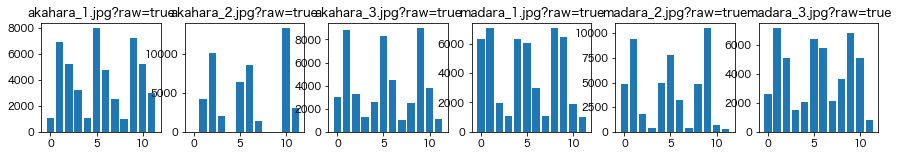

In [40]:
# dicrease color
def dic_color(img):
    img = img // 64 * 64 + 32
    return img

def get_feature(img):
    feat = np.zeros(12, dtype=np.float32)
    
    for i in range(4):
        feat[i,] = (img[..., 0] == (64 * i + 32)).sum() #len(np.where(img[..., 0] == (64 * j + 32))[0])
        feat[i + 4] = (img[..., 1] == (64 * i + 32)).sum()
        feat[i + 8] = (img[..., 2] == (64 * i + 32)).sum()
        
    return feat

# database
def get_db():
    train_paths = [
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/akahara_1.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/akahara_2.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/akahara_3.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/madara_1.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/madara_2.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/madara_3.jpg?raw=true"
    ]
    
    # prepare database
    db = np.zeros((len(train_paths), 13), dtype=np.float32)

    # each image
    for i, path in enumerate(train_paths):
        print(path)
        img = io.imread(path)
        img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_CUBIC)
        img = dic_color(img)
        feat = get_feature(img)
        db[i, :-1] = feat

        # get class
        if 'akahara' in path:
            cls = 0
        elif 'madara' in path:
            cls = 1

        # store class label
        db[i, -1] = cls

    return db, train_paths

# get database
db, train_paths = get_db()

fig, ax = plt.subplots(1, 6, figsize=(15, 2))

for i in range(len(db)):
    ax[i].set_title(train_paths[i].split("/")[-1])
    ax[i].bar(np.arange(12), db[i, :-1])
    
plt.show()

In [44]:
def assign_label_init(db, paths, class_n=2):
    feats = db.copy()
    
    # assign random label
    np.random.seed(1)
    feats[:, -1] = np.random.randint(0, class_n, len(db))
    
    # prepare gravity
    gs = np.zeros((class_n, feats.shape[1] - 1), dtype=np.float32)
    
    # get gravity
    for i in range(class_n):
        gs[i] = np.mean(feats[np.where(feats[..., -1] == i)[0], :12], axis=0)
        
    print(f"Assigned label: {feats[:, -1]}")
    print("Gravity:")
    print(gs)

In [45]:
assign_label_init(db, train_paths)

Assigned label: [1. 1. 0. 0. 1. 1.]
Gravity:
[[4647.5  7904.   2646.   1186.5  4446.   7174.5  3714.   1049.5  4772.
  7698.   2868.   1046.  ]
 [2123.75 6917.75 5560.25 1782.25 2035.25 7124.   5609.25 1615.5  2363.75
  6130.75 6088.25 1801.25]]


## Question 89 K-means (Step 2) クラスタリング

ここではアルゴリズム4-5も実装して、クラスタリングを行え。

ここで予測クラスが0,1となっているが、Q.85-87と違いラベルの順番はバラバラである。 なので、K-meansはあくまでカテゴリ別に分類する手法であり、それが具体的に何のクラスかまでは分からない。 また、クラス数は予めこちらが知って置かなければいけない。

K-meansクラスタリングでは最初に割り当てるラベルの状態によって、最後の出力が大きく左右されるので注意が必要である。 また、データ数が少ないと失敗しやすい。これはデータ数が少ないことで、真のデータの分布をサンプリングしにくいことが原因である。つまり、データ数が多いほどデータの分布が精度良くえられることによる。

In [46]:
def label_kmeans(db, paths, class_n=2):
    feats = db.copy()
    feat_n = feats.shape[1] - 1
    
    # assign random label
    np.random.seed(0)
    feats[:, -1] = np.random.randint(0, class_n, (len(db)))

    # prepare gravity
    gs = np.zeros((class_n, feat_n), dtype=np.float32)
        
    # get gravity
    for i in range(class_n):
        gs[i] = np.mean(feats[np.where(feats[..., -1] == i)[0], :feat_n], axis=0)

    while True:
        # prepare greavity
        gs = np.zeros((class_n, feat_n), dtype=np.float32)
        change_count = 0

        # compute gravity
        for i in range(class_n):
            gs[i] = np.mean(feats[np.where(feats[..., -1] == i)[0], :feat_n], axis=0)

        # re-labeling
        for i in range(len(feats)):
            # get distance each nearest graviry
            dis = np.sqrt(np.sum(np.square(np.abs(gs - feats[i, :feat_n])), axis=1))

            # get new label
            pred = np.argmin(dis, axis=0)

            # if label is difference from old label
            if int(feats[i, -1]) != pred:
                change_count += 1
                feats[i, -1] = pred

        if change_count < 1:
            break

    for i in range(db.shape[0]):
        print(paths[i].split("/")[-1], " Pred:", feats[i, -1])
        
label_kmeans(db, train_paths)

akahara_1.jpg?raw=true  Pred: 1.0
akahara_2.jpg?raw=true  Pred: 1.0
akahara_3.jpg?raw=true  Pred: 0.0
madara_1.jpg?raw=true  Pred: 0.0
madara_2.jpg?raw=true  Pred: 0.0
madara_3.jpg?raw=true  Pred: 1.0


## Question 90 K-means (Step 3) データを増やす

testの画像も加えてkmeansを行え。



In [47]:
def get_db_all():
    train_paths = [
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/akahara_1.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/akahara_2.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/akahara_3.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/madara_1.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/madara_2.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/madara_3.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/test/akahara_1.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/test/akahara_2.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/test/akahara_3.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/test/madara_1.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/test/madara_2.jpg?raw=true",
        "https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/test/madara_3.jpg?raw=true"
    ]
    
    # prepare database
    db = np.zeros((len(train_paths), 13), dtype=np.float32)

    # each image
    for i, path in enumerate(train_paths):
        print(path)
        img = io.imread(path)
        img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_CUBIC)
        img = dic_color(img)
        feat = get_feature(img)
        db[i, :-1] = feat

        # get class
        if 'akahara' in path:
            cls = 0
        elif 'madara' in path:
            cls = 1

        # store class label
        db[i, -1] = cls

    return db, train_paths

db2, train_paths2 = get_db_all()

print("\nkmeans")
label_kmeans(db2, train_paths2)

https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/akahara_1.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/akahara_2.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/akahara_3.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/madara_1.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/madara_2.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/train/madara_3.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/test/akahara_1.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/test/akahara_2.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/test/akahara_3.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/test/madara_1.jpg?raw=true
https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/tes